In [1]:
"""Explore the behaviour of optimal solution of linear autoencoder for 1 sample."""
import torch
import torch.nn as nn
import torch.optim as optim
from torch import transpose
from torch.linalg import inv
import matplotlib.pyplot as plt

In [2]:
class LAE(nn.Module):
    def __init__(self, M, N):
        super(LAE, self).__init__()
        self.m = M
        self.n = N
        self.w1 = nn.Linear(M, N, bias=False)
        self.w2 = nn.Linear(N, M, bias=False)

    def forward(self, y):
        y = self.w1(y)
        y = self.w2(y)
        return y

def L2Loss(outputs, targets):
    return torch.linalg.norm(outputs-targets)


In [3]:
M = 50
N = 40

inputs = torch.rand(M)*2
targets = inputs

In [4]:
net = LAE(M, N)

learning_rate = 0.000003
epochs = 20000
counter = 1000
params = list(net.parameters())
optimizer = optim.Adam(params, lr=learning_rate)

In [5]:
loss_plt = []
for epoch in range(epochs):
    optimizer.zero_grad()
    outputs = net(inputs)
    loss = L2Loss(outputs, targets)
    loss.backward()
    optimizer.step()
    #outputs = outputs.detach()
    loss_plt.append(loss.item())
    if ((epoch+1)%counter) == True:
        print('epoch: ', epoch, 'loss: ', loss.item())

epoch:  0 loss:  7.961854457855225
epoch:  1000 loss:  7.253173828125
epoch:  2000 loss:  6.433579921722412
epoch:  3000 loss:  5.512208461761475
epoch:  4000 loss:  4.5360517501831055
epoch:  5000 loss:  3.541959285736084
epoch:  6000 loss:  2.5217037200927734
epoch:  7000 loss:  1.4856083393096924
epoch:  8000 loss:  0.5663383603096008
epoch:  9000 loss:  0.00017290518735535443
epoch:  10000 loss:  9.646238322602585e-05
epoch:  11000 loss:  9.369331382913515e-05
epoch:  12000 loss:  8.21871726657264e-05
epoch:  13000 loss:  8.237779547926039e-05
epoch:  14000 loss:  7.91316560935229e-05
epoch:  15000 loss:  8.509113104082644e-05
epoch:  16000 loss:  8.072124910540879e-05
epoch:  17000 loss:  9.018174750963226e-05
epoch:  18000 loss:  8.409859583480284e-05
epoch:  19000 loss:  0.00010451177513459697


0.00010045698581961915

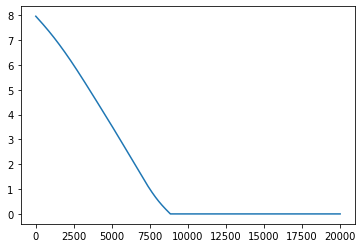

In [6]:
plt.plot(loss_plt)
loss_plt[-1]


In [7]:
L2Loss(net(inputs), targets)

tensor(0.0001, grad_fn=<LinalgVectorNormBackward0>)

In [8]:
print(params)

[Parameter containing:
tensor([[ 0.0916,  0.0746, -0.1133,  ..., -0.1688, -0.0524, -0.0142],
        [ 0.1433,  0.0594, -0.1018,  ..., -0.1049,  0.0275,  0.0510],
        [ 0.0164, -0.0734,  0.1022,  ..., -0.1102, -0.0573,  0.1144],
        ...,
        [ 0.1210,  0.0142,  0.0890,  ...,  0.1103,  0.0373,  0.0471],
        [-0.0303,  0.1144,  0.0214,  ..., -0.0090, -0.1234, -0.1443],
        [ 0.0308,  0.0278,  0.0002,  ...,  0.0699, -0.0455,  0.1346]],
       requires_grad=True), Parameter containing:
tensor([[ 0.1511, -0.1647,  0.0685,  ...,  0.0586, -0.1550, -0.1395],
        [-0.0029,  0.1392,  0.1178,  ..., -0.0886, -0.1235, -0.0704],
        [ 0.1044, -0.0789, -0.1174,  ...,  0.0182, -0.0018, -0.0525],
        ...,
        [-0.0147, -0.0521,  0.0533,  ...,  0.0701, -0.1455,  0.1122],
        [ 0.0259, -0.0825, -0.0958,  ...,  0.0031,  0.0653,  0.1075],
        [ 0.1347,  0.1290, -0.1241,  ...,  0.1154,  0.0781,  0.1047]],
       requires_grad=True)]


In [9]:
W1 = params[0].requires_grad_(False)
W2 = params[1].requires_grad_(False)

In [10]:
inputs.resize_(M, 1)
sum(abs(W2@W1@inputs) - inputs)

tensor([0.0001])

In [11]:
Y = inputs
grad_w1_true = 2 * transpose(W2, 0, 1) @ (W2@W1-torch.eye(M)) @ Y @ transpose(Y, 0, 1)
grad_w2_true = 2 * (W2@W1-torch.eye(M)) @ Y @ transpose(Y, 0, 1) @ transpose(W1, 0, 1)

In [12]:
print(grad_w1_true)
print(grad_w2_true)

tensor([[ 6.4477e-05,  3.8632e-05,  2.6824e-05,  ...,  1.2181e-05,
          6.5023e-05,  6.0353e-05],
        [-4.1171e-05, -2.4668e-05, -1.7128e-05,  ..., -7.7782e-06,
         -4.1520e-05, -3.8538e-05],
        [-2.9761e-05, -1.7831e-05, -1.2381e-05,  ..., -5.6225e-06,
         -3.0013e-05, -2.7857e-05],
        ...,
        [ 2.1938e-05,  1.3144e-05,  9.1270e-06,  ...,  4.1447e-06,
          2.2124e-05,  2.0535e-05],
        [-6.4109e-06, -3.8412e-06, -2.6672e-06,  ..., -1.2112e-06,
         -6.4653e-06, -6.0009e-06],
        [ 7.3225e-06,  4.3874e-06,  3.0464e-06,  ...,  1.3834e-06,
          7.3846e-06,  6.8543e-06]])
tensor([[-7.2263e-05,  5.5413e-05, -7.5290e-05,  ...,  4.0111e-05,
         -1.0539e-04,  4.0096e-05],
        [ 2.9763e-05, -2.2823e-05,  3.1010e-05,  ..., -1.6521e-05,
          4.3406e-05, -1.6514e-05],
        [-1.1233e-05,  8.6138e-06, -1.1704e-05,  ...,  6.2351e-06,
         -1.6382e-05,  6.2327e-06],
        ...,
        [ 3.0736e-05, -2.3569e-05,  3.2024e-05

In [13]:
Y @ transpose(Y, 0, 1) @ transpose(W1, 0, 1)

tensor([[-1.4643,  1.1229, -1.5256,  ...,  0.8128, -2.1355,  0.8125],
        [-0.8773,  0.6728, -0.9141,  ...,  0.4870, -1.2795,  0.4868],
        [-0.6092,  0.4671, -0.6347,  ...,  0.3381, -0.8884,  0.3380],
        ...,
        [-0.2766,  0.2121, -0.2882,  ...,  0.1536, -0.4035,  0.1535],
        [-1.4767,  1.1324, -1.5386,  ...,  0.8197, -2.1536,  0.8194],
        [-1.3707,  1.0510, -1.4281,  ...,  0.7608, -1.9989,  0.7605]])

In [14]:
if torch.linalg.matrix_rank(W2) == N:
    test_mat = W2 @ inv(transpose(W2, 0, 1) @ W2) @ transpose(W2, 0, 1) - torch.eye(M)
    print(torch.linalg.matrix_rank(test_mat + torch.eye(M)))
    print(torch.linalg.matrix_rank(test_mat))

tensor(40)
tensor(10)


In [15]:
inv(transpose(W2, 0, 1) @ W2) @ (transpose(W2, 0, 1)-W1) @ Y @ transpose(Y, 0, 1)

tensor([[ -3.1424,  -1.8828,  -1.3074,  ...,  -0.5937,  -3.1691,  -2.9415],
        [ -1.3296,  -0.7966,  -0.5532,  ...,  -0.2512,  -1.3409,  -1.2446],
        [ 11.1548,   6.6835,   4.6408,  ...,   2.1074,  11.2494,  10.4414],
        ...,
        [ -0.4277,  -0.2563,  -0.1780,  ...,  -0.0808,  -0.4314,  -0.4004],
        [  2.8009,   1.6782,   1.1653,  ...,   0.5292,   2.8247,   2.6218],
        [-13.3922,  -8.0240,  -5.5716,  ...,  -2.5301, -13.5057, -12.5357]])

In [16]:
Y @ transpose(Y, 0, 1)

tensor([[0.9737, 0.5834, 0.4051,  ..., 0.1840, 0.9820, 0.9114],
        [0.5834, 0.3496, 0.2427,  ..., 0.1102, 0.5883, 0.5461],
        [0.4051, 0.2427, 0.1685,  ..., 0.0765, 0.4085, 0.3792],
        ...,
        [0.1840, 0.1102, 0.0765,  ..., 0.0348, 0.1855, 0.1722],
        [0.9820, 0.5883, 0.4085,  ..., 0.1855, 0.9903, 0.9192],
        [0.9114, 0.5461, 0.3792,  ..., 0.1722, 0.9192, 0.8531]])

In [17]:
print(torch.linalg.matrix_rank((W2 @ W1) - torch.eye(M)))
print(torch.linalg.matrix_rank((W2 @ W1 - torch.eye(M)) @ Y @ transpose(Y, 0, 1)))

tensor(49)
tensor(1)
